In [1]:
import pandas as pd
df = pd.read_csv(r'C:\Users\JeanPhilippeNdri\Desktop\Fortuneo\data_train.csv', sep=',', decimal='.')
#df = pd.get_dummies(df, columns=['Vehicle_Age'], drop_first=False, dummy_na=False)
df = df.drop(columns=['id', 'Region_Code'])
df

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Female,45,1,0,1-2 Year,Yes,21406.0,124.0,22,0
1,Male,25,1,1,< 1 Year,No,58078.0,152.0,86,0
2,Female,57,1,1,1-2 Year,No,2630.0,26.0,214,0
3,Male,50,1,0,1-2 Year,Yes,2630.0,163.0,61,0
4,Female,21,1,0,< 1 Year,Yes,44589.0,152.0,131,0
...,...,...,...,...,...,...,...,...,...,...
346071,Female,37,1,0,1-2 Year,Yes,2630.0,156.0,218,0
346072,Male,54,1,0,> 2 Years,Yes,36962.0,122.0,36,0
346073,Female,25,1,1,< 1 Year,No,37004.0,152.0,294,0
346074,Male,22,1,1,< 1 Year,No,40338.0,152.0,67,0


In [2]:
#df['Gender'] = df['Gender'].map({'Male': 1,'Female': 0})
#df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'Yes': 1,'No': 0})
#df['Vehicle_Age'] = df['Vehicle_Age'].map({'< 1 Year': 1,'1-2 Year': 2,'> 2 Years': 3})

In [3]:
#df

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,45,1,0,2,1,21406.0,124.0,22,0
1,1,25,1,1,1,0,58078.0,152.0,86,0
2,0,57,1,1,2,0,2630.0,26.0,214,0
3,1,50,1,0,2,1,2630.0,163.0,61,0
4,0,21,1,0,1,1,44589.0,152.0,131,0
...,...,...,...,...,...,...,...,...,...,...
346071,0,37,1,0,2,1,2630.0,156.0,218,0
346072,1,54,1,0,3,1,36962.0,122.0,36,0
346073,0,25,1,1,1,0,37004.0,152.0,294,0
346074,1,22,1,1,1,0,40338.0,152.0,67,0


In [2]:
from pycaret.classification import *

In [3]:
exp_clf101 = setup(data = df, target = 'Response', session_id=123) 

,Description,Value
0,session_id,123
1,Target,Response
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(346076, 10)"
5,Missing Values,0
6,Numeric Features,4
7,Categorical Features,5
8,Ordinal Features,0
9,High Cardinality Features,0


In [4]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9660,0.6936,0.0000,0.0000,0.0000,0.0000,0.0000,2.3230
ridge,Ridge Classifier,0.9660,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2030
ada,Ada Boost Classifier,0.9660,0.8496,0.0000,0.0000,0.0000,0.0000,0.0000,4.5450
lda,Linear Discriminant Analysis,0.9660,0.8322,0.0001,0.1000,0.0002,0.0002,0.0033,0.4360
dummy,Dummy Classifier,0.9660,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0980
gbc,Gradient Boosting Classifier,0.9659,0.8533,0.0001,0.0200,0.0002,0.0002,0.0013,19.6340
catboost,CatBoost Classifier,0.9658,0.8479,0.0002,0.0458,0.0005,0.0002,0.0012,29.5880
lightgbm,Light Gradient Boosting Machine,0.9657,0.8516,0.0000,0.0000,0.0000,-0.0006,-0.0030,1.2380
knn,K Neighbors Classifier,0.9652,0.5422,0.0012,0.0450,0.0024,0.0008,0.0022,11.8770
nb,Naive Bayes,0.9643,0.8119,0.0055,0.0976,0.0103,0.0065,0.0148,0.2080


In [6]:
print(best_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [7]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9659,0.5622,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9659,0.8252,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9659,0.5594,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9660,0.8318,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9660,0.8268,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9660,0.8307,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9660,0.5565,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9659,0.5474,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9659,0.5645,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.9659,0.8314,0.0000,0.0000,0.0000,0.0000,0.0000


In [8]:
#gbc = create_model('gbc')

In [9]:
#tuned_gbc = tune_model(gbc)

In [10]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9659,0.5622,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9659,0.5440,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9659,0.5594,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9660,0.8339,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9660,0.8268,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9660,0.8307,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9660,0.8291,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9659,0.5474,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9659,0.5645,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.9659,0.8314,0.0000,0.0000,0.0000,0.0000,0.0000


In [11]:
#tuned model object is stored in the variable 'tuned_dt'. 
print(tuned_lr)

LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


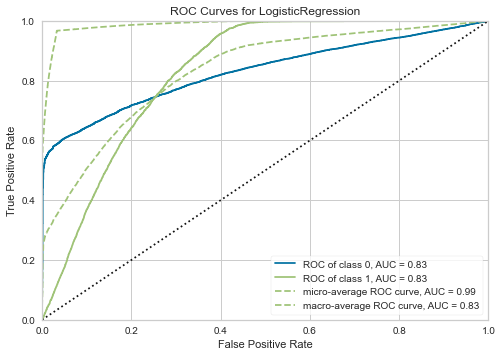

In [12]:
plot_model(tuned_lr, plot = 'auc')

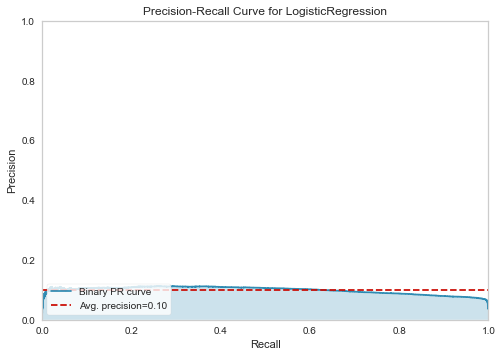

In [13]:
plot_model(tuned_lr, plot = 'pr')

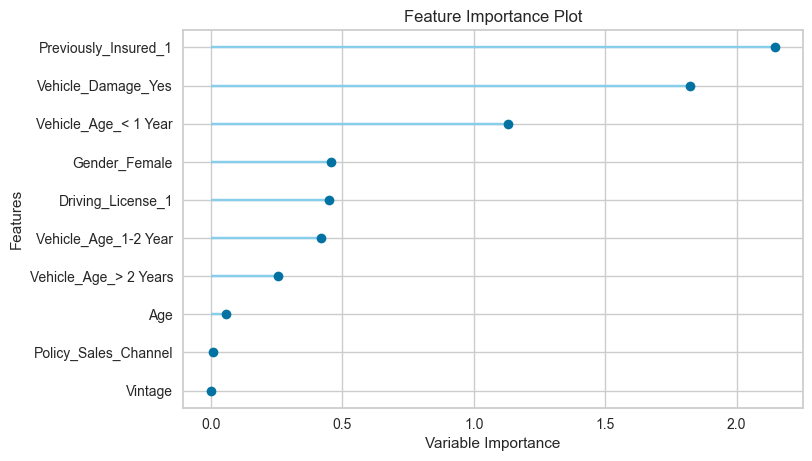

In [14]:
plot_model(tuned_lr, plot='feature')

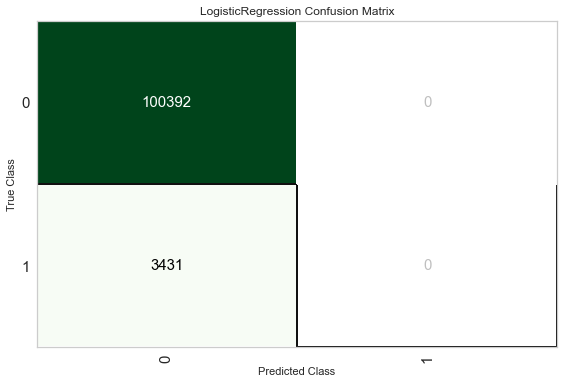

In [15]:
plot_model(tuned_lr, plot = 'confusion_matrix')

In [ ]:
evaluate_model(tuned_lr)